# Lab assignment: indoor image classification

<img src="img/indoor_outdoor.png" style="width:800px;">

In this assignment we will face an image classification problem, trying to tell apart images taken indoors from images taken on the outside. To do so we will use a Deep Learning approach.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>

During the assigment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **matplotlib**
* **keras**

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from PIL import Image
import cv2
from scipy import ndimage
from skimage import color, exposure, transform
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Preliminaries: data loading and image representation

In this assignment we will work with the images contained in the following folders, where training and test data is available:

In [2]:
trainingdatafolder = "./trainingdata/"
testdatafolder = "./testdata/"

For each one of these folders two subfolders exist: one containing a range of indoor images and another one with outdoor images. We can load an image into python by making use of:

In [3]:
from scipy.misc import imread
path = trainingdatafolder + "indoor/1.jpg"
image = imread(path)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


This returns the image as 3-dimensional numpy matrix, containing the value of intensity of every pixel in each row, column and color channel.

In [4]:
image.shape
np.random.seed(30)

We can visualize the loaded image using

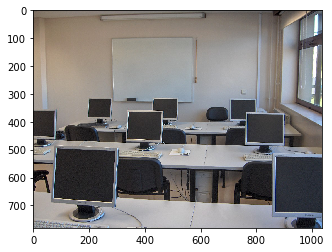

In [5]:
plt.imshow(image)

Note that the 3rd dimension of our image objects is the pixel intensity. This is divided into 3 **color channels**: those belonging to the red (R), green (G) and blue (B) intensities (**RGB** scheme). Each of these intensities ranges from 0 to 255, since these are 24-bit images: each of the 3 colors is represented by 8 bits, so they can range from 0 (all 8 bits set to 0) to 255 (all 8 bits set to 1). Let us define constants for this:

In [6]:
COLORS = ('r','g','b')
COLOR_MIN_VALUE = 0
COLOR_MAX_VALUE = 255
COLOR_NUM_VALUES = COLOR_MAX_VALUE - COLOR_MIN_VALUE + 1

When R, G and B are all zero, the pixel is totally black. When they are all 255, the pixel is totally white. Pure red is (255, 0, 0), pure green (0, 255, 0) and pure blue (0, 0, 255). Intermediate colors have intermediate values, according to what the specific pixel is. For example, let us manipulate the colors of the previous image:

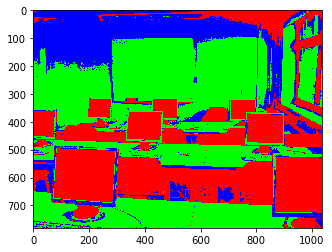

In [7]:
# Tolerance for white and black
tol = 120
white_end = tol - COLOR_MIN_VALUE
black_start = COLOR_MAX_VALUE - tol
# Copy image
image2 = image.copy()
# Set black pixels to pure red
black_pixels = (image[:, :, 0] <= white_end) & (image[:, :, 1] <= white_end) & (image[:, :, 2] <= white_end)
image2[black_pixels] = [COLOR_MAX_VALUE, COLOR_MIN_VALUE, COLOR_MIN_VALUE]
# Set white pixels to pure green
white_pixels = (image[:, :, 0] >= black_start) & (image[:, :, 1] >= black_start) & (image[:, :, 2] >= black_start)
image2[white_pixels] = [COLOR_MIN_VALUE, COLOR_MAX_VALUE, COLOR_MIN_VALUE]
# Set all the rest to pure blue
image2[~(black_pixels | white_pixels)] = [COLOR_MIN_VALUE, COLOR_MIN_VALUE, COLOR_MAX_VALUE]
# Plot result
plt.imshow(image2)

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Build a matrix *X_train* containing one row for each training image in the data. Each row must contain the 3-dimensional matrix of pixels corresponding to an image. Build also a corresponding matrix *Y_train* with the class of each training image (0 for indoor and 1 for outdoor). Then repeat the same procedure to generator *X_test* and *Y_test* matrices for the test data.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Take advantage of the *glob* package to generate the filename lists for the indoor and outdoor subfolders.
 </td></tr>
</table>

In [8]:
####### INSERT YOUR CODE HERE
from skimage import io
import os
import glob
trainingdatafolder = "./trainingdata/*/*.jpg"
testdatafolder = "./testdata/*/*.jpg"
addrs = glob.glob(trainingdatafolder)
np.random.seed(5)
np.random.shuffle(addrs)


img_size =128
imgs = []
labels1 = []
for img_path in addrs:
    #img = preprocess_img(io.imread(img_path))
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    #img = preprocess_img(img)
    #img = img_to_array(image)
    label = 0 if 'indoor' in img_path else 1 
    imgs.append(img)
    labels1.append(label)

#imgs= np.array(imgs, dtype="float") / 255.0
X_train =imgs
Y_train = np.eye(2, dtype='uint8')[labels1]

imgs = []
labels2 = []
addrs = glob.glob(testdatafolder)
for img_path in addrs:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    #img = preprocess_img(img)
    #img = img_to_array(image)
    label = 0 if 'indoor' in img_path else 1 
    imgs.append(img)
    labels2.append(label)
#imgs= np.array(imgs, dtype="float") / 255.0
X_test = imgs
# Make one hot targets
Y_test = np.eye(2, dtype='uint8')[labels2]


If everything has been properly loaded both X_train and Y_train lists should have equal length, and the same should happen for the pair X_test and Y_test.

In [9]:
print("X_train size", len(X_train))
print("Y_train size", len(Y_train))
print("X_test size", len(X_test))
print("Y_test size", len(Y_test))

X_train size 188
Y_train size 188
X_test size 188
Y_test size 188


## Data preprocessing

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
For efficiency in batch processing, in keras all input patterns should have equal dimensions. Even more, when working with images keras expects as training input a 4-dimensional matrix with dimensions (patterns, image_width, image_height, color_channels). Therefore, you must preprocess the data into this format. It is also highly recommended to rescale the pixel values to make them lie in the range [0,1]. Finally, you might also need to perform some transformation on the outputs Y.
 </td></tr>
</table>

#### we will use histogram equalization in HSV  rather than only divide between 255

In [10]:
## we will use histogram normalization rather than divide between 255
def preprocess_img(img):
    # Histogram normalization in v channel
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)

    # central square crop
    min_side = min(img.shape[:-1])
    #img = img.astype('float32') / 255.0
    centre = img.shape[0] // 2, img.shape[1] // 2
    img = img[centre[0] - min_side // 2:centre[0] + min_side // 2,
              centre[1] - min_side // 2:centre[1] + min_side // 2,
              :]
    return img

In [11]:
####### INSERT YOUR CODE HERE
X_train_norm = []
for img in X_train:
    img = preprocess_img(img)
    X_train_norm.append(img)

X_train_norm = np.squeeze(X_train_norm)

In [12]:
X_test_norm = []
for img in X_test:
    img = preprocess_img(img)
    X_test_norm.append(img)

X_test_norm = np.squeeze(X_test_norm)

### We are going to draw some images to see the difference in the treatment of the image

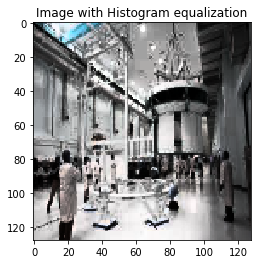

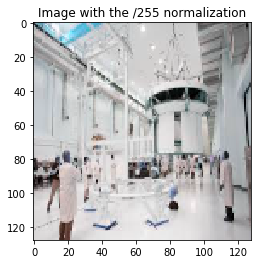

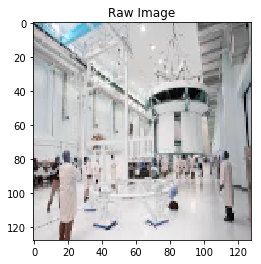

In [13]:
plt.imshow(X_train_norm[0])
plt.title("Image with Histogram equalization")
plt.show()
plt.imshow(X_train[0]/255.0)
plt.title("Image with the /255 normalization")
plt.show()
plt.imshow(X_train[0])
plt.title("Raw Image")
plt.show()

## Deep model

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Create a deep network that solves the classification problem. Make use of the layers you seem fit for problem. You cannot use the test data for fitting the network, but you can use it to check the performance of different network architectures over such test data, and select the architecture performing best.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
A minimum of 70% accuracy in test is to be expected when solving this problem. If you are unable to attain this result, check that the data is organized correctly, and that the values of the pixels have been normalized. Resizing the images to smaller sizes might be helpful as well. Also, if you observe that your network does not improve the loss after each training epoch, that might be another symptom of one of the problems above, or of a wrong network design.
 </td></tr>
</table>

In [14]:
####### INSERT YOUR CODE HERE
from keras.utils import np_utils

Y_train = np.eye(2, dtype='uint8')[labels1]

Y_test = np.eye(2, dtype='uint8')[labels2]


C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We had fiished with a simple model, because we get the better results

In [15]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.regularizers import l2 # L2-regularisation

np.random.seed(30)
img_rows = img_size
img_cols = img_size
kernel_size = 3 # Size of the kernel for the convolution layers(tamaño filtro)
pool_size =2

def cnn_model():
    model = Sequential()

    model.add(Convolution2D(32, (kernel_size, kernel_size), padding='same',
                     input_shape=(img_size, img_size, 3),
                     activation='relu',  kernel_initializer='he_normal'))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(64, (kernel_size, kernel_size), padding='same',
                     activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(0.8))
    model.add(Dense(2, activation='softmax'))
    return model

model = cnn_model()

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [16]:
history = model.fit(
    X_train_norm, # Training data
    Y_train, # Labels of training data
    batch_size=56, # Batch size for the optimizer algorithm
    epochs=15, # Number of epochs to run the optimizer algorithm
    verbose=1, # Level of verbosity of the log messages
    validation_split=0.28
)

Train on 135 samples, validate on 53 samples
Epoch 1/15
135/135 [==============================] - 25s - loss: 1.7435 - acc: 0.5407 - val_loss: 0.8286 - val_acc: 0.4340
Epoch 2/15
135/135 [==============================] - 26s - loss: 0.9535 - acc: 0.4667 - val_loss: 0.6936 - val_acc: 0.5660
Epoch 3/15
135/135 [==============================] - 24s - loss: 0.7187 - acc: 0.4593 - val_loss: 0.6911 - val_acc: 0.6604
Epoch 4/15
135/135 [==============================] - 25s - loss: 0.6828 - acc: 0.5778 - val_loss: 0.6888 - val_acc: 0.5849
Epoch 5/15
135/135 [==============================] - 25s - loss: 0.6875 - acc: 0.5852 - val_loss: 0.6797 - val_acc: 0.5849
Epoch 6/15
135/135 [==============================] - 25s - loss: 0.6844 - acc: 0.5704 - val_loss: 0.6678 - val_acc: 0.5660
Epoch 7/15
135/135 [==============================] - 25s - loss: 0.6808 - acc: 0.5037 - val_loss: 0.6445 - val_acc: 0.5660
Epoch 8/15
135/135 [==============================] - 25s - loss: 0.6532 - acc: 0.5630 

#### The Evolution of Training Accuracy

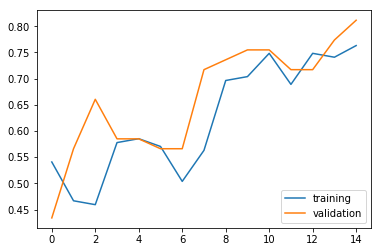

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.show()

In [18]:
score = model.evaluate(X_test_norm, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

188/188 [==============================] - 9s     
Test loss 0.46877316781815065
Test accuracy 0.7978723429618998


In [19]:
preds = model.predict(X_test_norm)

Real class [0 1] 
Predicted class [0.00184207 0.9981579 ]


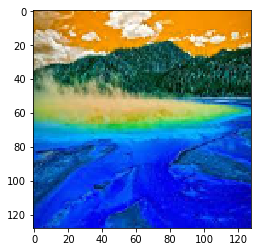

In [20]:
plt.imshow(X_test[186])
print("Real class", Y_test[186], "\nPredicted class", preds[186])

We can see that for a random image of test, the model predict with 99% of probability that the image is from outdoor, and is correct

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
You can further improve your results by applying one or more of the following strategies:
<ul>
<li>Make use of **metamodelling techniques** to selected the best architecture parameters for the networks. You can use scikit-learn methods GridSearchCV or RandomSearchCV. Even better, you can make use of more advanced methods such as those included in the <a href="https://scikit-optimize.github.io/">scikit-optimize</a> library.</li>
<li>Use **image augmentation techniques** to produce additional noisy training images. To do so, you can make use of <a href="https://keras.io/preprocessing/image/">ImageDataGenerator</a> in Keras.</li>
<li>Use an <a href="https://keras.io/callbacks/#earlystopping">**EarlyStopping strategy**</a> to monitor the loss over the test data, and stop when training when after a number of iterations such loss has not improved.
</ul>
If you correctly use these techniques you should be able to obtain a better model, with test accuracy over 80%.
  
 </td></tr>
</table>

In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=2, mode='min', min_delta=0.0) 
callbacks_list = [ early_stop]

def build_classifier_nn(optimizer, kernel_initializer, callbacks=callbacks_list):
    model = Sequential()

    model.add(Convolution2D(32, (kernel_size, kernel_size), padding='same',
                     input_shape=(img_size, img_size, 3),
                     activation='relu',  kernel_initializer='he_normal'))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(64, (kernel_size, kernel_size), padding='same',
                     activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(0.8))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model

classifier = KerasClassifier(build_fn = build_classifier_nn)
parameters = {'batch_size': [32, 56],
              'epochs': [20],
              'optimizer': ['sgd', 'adam'],
              'kernel_initializer': [ 'he_normal'],
              'callbacks':[callbacks_list],
              
             }
random_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)
random_search = random_search.fit(X_train_norm, labels1)


Epoch 1/20
125/125 [==============================] - 24s - loss: 0.7380 - acc: 0.5040    
Epoch 2/20
125/125 [==============================] - 22s - loss: 0.6687 - acc: 0.5680    
Epoch 3/20
125/125 [==============================] - 22s - loss: 0.7049 - acc: 0.5600    
Epoch 4/20
125/125 [==============================] - 22s - loss: 0.6760 - acc: 0.5920    
Epoch 5/20
125/125 [==============================] - 7s     
Epoch 1/20
125/125 [==============================] - 22s - loss: 0.7310 - acc: 0.4560    
Epoch 2/20
125/125 [==============================] - 20s - loss: 0.7535 - acc: 0.4080    
Epoch 3/20
125/125 [==============================] - 20s - loss: 0.6622 - acc: 0.6560    
Epoch 4/20
125/125 [==============================] - 22s - loss: 0.6780 - acc: 0.5600    
Epoch 5/20
125/125 [==============================] - 21s - loss: 0.7122 - acc: 0.4880    
Epoch 6/20
125/125 [==============================] - 7s     
Epoch 1/20
126/126 [==============================] - 23s

126/126 [==============================] - 17s - loss: 0.6705 - acc: 0.5635    
Epoch 8/20
126/126 [==============================] - 16s - loss: 0.6705 - acc: 0.6032    
Epoch 9/20
126/126 [==============================] - 16s - loss: 0.6272 - acc: 0.6667    
Epoch 10/20
126/126 [==============================] - 16s - loss: 0.6830 - acc: 0.5873    
Epoch 11/20
126/126 [==============================] - 16s - loss: 0.6515 - acc: 0.6270    
Epoch 12/20
126/126 [==============================] - 16s - loss: 0.5899 - acc: 0.6905    
Epoch 13/20
126/126 [==============================] - 16s - loss: 0.6426 - acc: 0.6032    
Epoch 14/20
126/126 [==============================] - 16s - loss: 0.6823 - acc: 0.6111    
Epoch 15/20
126/126 [==============================] - 5s     
Epoch 1/20
125/125 [==============================] - 17s - loss: 2.6545 - acc: 0.5520    
Epoch 2/20
125/125 [==============================] - 17s - loss: 1.2702 - acc: 0.4800    
Epoch 3/20
125/125 [=============

In [22]:
best_parameters = random_search.best_params_
print(best_parameters)
#best_accuracy =random_search.best_score_
print(random_search.best_score_)

{'batch_size': 56, 'callbacks': [<keras.callbacks.EarlyStopping object at 0x000002221B873C18>], 'epochs': 20, 'kernel_initializer': 'he_normal', 'optimizer': 'adam'}
0.7180851063829787


Test Accuracy:

In [23]:
####### INSERT YOUR CODE HERE
score = random_search.score(X_test_norm, Y_test[:,1])
#print("Test loss", score[0])
print("Test accuracy", score)

188/188 [==============================] - 9s     
Test accuracy 0.776595744680851


##### The Grid Search technique does not seem to be effective in this problem, because is too slow

### Let`s try Data Augmentation with the best parameters got from the Grid Search

In [24]:
def cnn_model():
    model = Sequential()

    model.add(Convolution2D(32, (kernel_size, kernel_size), padding='same',
                     input_shape=(img_size, img_size, 3),
                     activation='relu',  kernel_initializer='he_normal'))
    model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(64, (kernel_size, kernel_size), padding='same',
                     activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(0.8))
    model.add(Dense(2, activation='softmax'))
    
    return model

model = cnn_model()



In [34]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

early_stop = EarlyStopping(monitor='val_acc', patience=2, mode='max', min_delta=0.0) 
callbacks_list = [ early_stop]


X_train_d, X_val, Y_train_d, Y_val = train_test_split(X_train_norm, Y_train,
                                                  test_size=0.4, random_state=50)



datagen = ImageDataGenerator(zoom_range=0.0,
                             rotation_range=10.,
                            featurewise_center=False,
                             featurewise_std_normalization=False,
                             horizontal_flip=True,
                             #height_shift_range=0.1,
                            )
# fit parameters from data

datagen.fit(X_train_d, seed=50 )
cnn_aug_model = cnn_model()
cnn_aug_model.compile(loss='binary_crossentropy',
          optimizer="adam",
          metrics=['accuracy'])
batch_s =128
history = cnn_aug_model.fit_generator(
    datagen.flow(X_train_d, Y_train_d, batch_size=batch_s),
    steps_per_epoch=((X_train_d.shape[0])),
    epochs=35, # Number of epochs to run the optimizer algorithm
    verbose=1, # Level of verbosity of the log messages
    validation_data=(X_val, Y_val), callbacks = [early_stop],
    )
    

Epoch 1/35
112/112 [==============================] - 1827s - loss: 7.3835 - acc: 0.5354 - val_loss: 7.5933 - val_acc: 0.5263
Epoch 2/35
112/112 [==============================] - 1972s - loss: 7.4425 - acc: 0.5357 - val_loss: 7.5933 - val_acc: 0.5263
Epoch 3/35
112/112 [==============================] - 2006s - loss: 7.4425 - acc: 0.5357 - val_loss: 7.5933 - val_acc: 0.5263
Epoch 4/35
112/112 [==============================] - 1942s - loss: 1.2859 - acc: 0.7734 - val_loss: 1.7123 - val_acc: 0.6184
Epoch 5/35
112/112 [==============================] - 1946s - loss: 0.0189 - acc: 0.9941 - val_loss: 2.4744 - val_acc: 0.6579
Epoch 6/35
112/112 [==============================] - 1885s - loss: 0.0430 - acc: 0.9884 - val_loss: 1.8715 - val_acc: 0.7237
Epoch 7/35
112/112 [==============================] - 1977s - loss: 0.0013 - acc: 0.9998 - val_loss: 2.3304 - val_acc: 0.6711
Epoch 8/35
112/112 [==============================] - 2048s - loss: 3.5869e-04 - acc: 1.0000 - val_loss: 2.3781 - val_

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Compute the accuracy of your network over the test set.
 </td></tr>
</table>

In [35]:
####### INSERT YOUR CODE HERE
score = cnn_aug_model.evaluate(X_test_norm, Y_test)
#print("Test loss", score[0])
print("Test accuracy", score[1])

188/188 [==============================] - 10s    
Test accuracy 0.8031914931662539


In [36]:
preds = cnn_aug_model.predict_proba(X_test_norm)

188/188 [==============================] - 12s    


Real class [0 1] 
Predicted class [7.441157e-08 9.999999e-01]


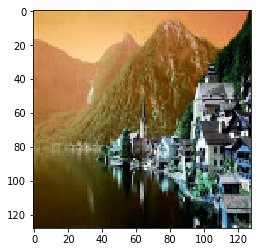

In [37]:
plt.imshow(X_test_norm[101])
print("Real class", Y_test[101], "\nPredicted class", preds[101])

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Find and show an image for which the model fails. Can you give an explanation for this behavior?
 </td></tr>
</table>

### Let's test the model performance with images not in test or train data folder, we had taken new images from Internet (in folder "imagenes")

1/1 [==============================] - 0s

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':



Class Predicted Indoor: 0.99863726 Outdoor: 0.0013627347


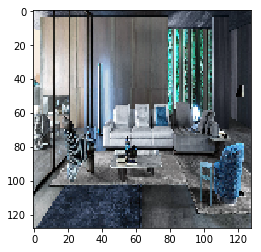

1/1 [==============================] - 0s
Class Predicted Indoor: 0.000452293 Outdoor: 0.99954766


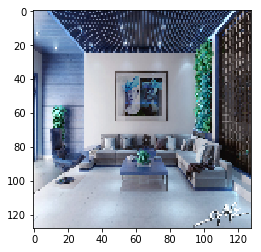

1/1 [==============================] - 0s
Class Predicted Indoor: 3.110325e-05 Outdoor: 0.9999689


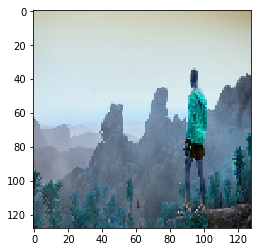

1/1 [==============================] - 0s
Class Predicted Indoor: 0.9999571 Outdoor: 4.2876523e-05


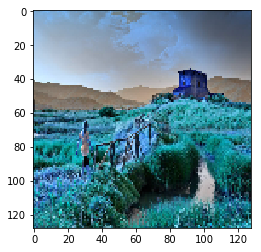

In [38]:
####### INSERT YOUR CODE HERE

for i in range(1,5):
    my_image = "test"+str(i)+".jpg"   # change this to the name of your image file 
    #print(my_image)
    fname = "imagenes/" + my_image
    img = cv2.imread(fname)
    img = cv2.resize(img, (img_size, img_size))

    img_norm = preprocess_img(img)

    img_norm = scipy.misc.imresize(img_norm, size=(img_size,img_size, 3)).reshape((1, img_size,img_size,3))
    #print(img_norm.shape)
    plt.imshow(img_norm[0])
    pred_new = cnn_aug_model.predict_proba(img_norm)
    print("Class Predicted Indoor:", pred_new[0][0],"Outdoor:", pred_new[0][1])
    plt.imshow(img)
    plt.show()


As we can see the model predict very well in unseen data (new data we collect form internet).

###### Even if the quality of this data set is quite high, the model fails because it does not see all the possible images, we have trained the model with a limited amount of data (it is a limited problem). There are infinities of  possibles images indoor-outdoor.
The model Although it generalizes well, it is not capable of differentiating all the possible images.